<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Multi-label-classification" data-toc-modified-id="Multi-label-classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Multi-label classification</a></span></li><li><span><a href="#The-history-callback" data-toc-modified-id="The-history-callback-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The history callback</a></span></li><li><span><a href="#Early-stopping-your-model" data-toc-modified-id="Early-stopping-your-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Early stopping your model</a></span></li><li><span><a href="#A-combination-of-callbacks" data-toc-modified-id="A-combination-of-callbacks-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>A combination of callbacks</a></span></li><li><span><a href="#Different-activation-functions" data-toc-modified-id="Different-activation-functions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Different activation functions</a></span></li><li><span><a href="#Hyperparameter-tuning" data-toc-modified-id="Hyperparameter-tuning-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Hyperparameter tuning</a></span></li><li><span><a href="#Learning-curves" data-toc-modified-id="Learning-curves-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Learning curves</a></span></li></ul></div>

# Multi-label classification

Dataset:
Our datset is composed of 2000 different samples which contains 20 sensors and 3 parcels. 
<img src="yard.png" style="width:400px;height:250px;">
<caption><center> <u><font color='purple'>Figure 1</u><font color='purple'>: <br> <font color='black'> </center>


As can be seen here, we follow this process to write the model, fit it and calculate the best hyperparameters.

<img src="schem.png" style="width:470px;height:120px;">
<caption><center> <u><font color='purple'>Figure 2</u><font color='purple'>: <br> <font color='black'> </center>


Computational details:
One-vs-all classification is a method which involves training N distinct binary classifiers, each designed for recognizing a particular class. Then those N classifiers are collectively used for multi-class classification as demonstrated below:


<img src="onevsall.png" style="width:400px;height:250px;">
<caption><center> <u><font color='purple'>Figure 3</u><font color='purple'>: <br> <font color='black'> </center>

In [2]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import seaborn as sns

Using TensorFlow backend.


In [425]:
train = pd.read_csv("irrigation_machine.csv")
train.describe()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000
mean,999.500000,1.437000,1.659000,2.654500,2.674500,2.887500,1.411000,3.315500,4.201500,1.214000,...,2.731500,3.416000,1.206500,2.325000,1.729500,2.27450,1.813500,0.63550,0.730500,0.212000
std,577.494589,1.321327,1.338512,1.699286,1.855875,1.816451,1.339394,2.206444,2.280241,1.386782,...,1.774537,1.960578,1.258034,1.715181,1.561265,1.67169,1.469285,0.48141,0.443811,0.408827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,499.750000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,3.000000,0.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.00000,0.000000,0.000000
50%,999.500000,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,3.000000,4.000000,1.000000,...,2.000000,3.000000,1.000000,2.000000,1.000000,2.00000,2.000000,1.00000,1.000000,0.000000
75%,1499.250000,2.000000,2.000000,4.000000,4.000000,4.000000,2.000000,5.000000,6.000000,2.000000,...,4.000000,5.000000,2.000000,3.000000,3.000000,3.00000,3.000000,1.00000,1.000000,0.000000
max,1999.000000,8.000000,9.000000,10.000000,11.000000,12.000000,7.000000,13.000000,12.000000,8.000000,...,11.000000,11.000000,6.000000,10.000000,11.000000,10.00000,7.000000,1.00000,1.000000,1.000000


In [35]:
sensors= train.iloc[:,1:21]
parcels= train.iloc[:,21:24]
from sklearn.model_selection import train_test_split
sensors_train, sensors_test, parcels_train, parcels_test = train_test_split(sensors, parcels, test_size=0.33, random_state=42)

In [427]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import seaborn as sns
import numpy as np

# Instantiate a Sequential model
model = Sequential()
# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64, input_shape=(20,), activation='relu'))

# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation='sigmoid'))

# Compile your model with adam and binary crossentropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [429]:
# Train for 100 epochs using a validation split of 0.2
model.fit(sensors_train, parcels_train, epochs=100, validation_split=0.2)

# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)

# Evaluate your model's accuracy on the test data
accuracy = model.evaluate(sensors_test, parcels_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Train on 1072 samples, validate on 268 samples
Epoch 1/100
1072/1072 [==============================] - 0s 124us/sample - loss: 0.1233 - accuracy: 0.9518 - val_loss: 0.2180 - val_accuracy: 0.9080
Epoch 2/100
1072/1072 [==============================] - 0s 115us/sample - loss: 0.1232 - accuracy: 0.9499 - val_loss: 0.2184 - val_accuracy: 0.9092
Epoch 3/100
1072/1072 [==============================] - 0s 115us/sample - loss: 0.1213 - accuracy: 0.9481 - val_loss: 0.2234 - val_accuracy: 0.9080
Epoch 4/100
1072/1072 [==============================] - 0s 92us/sample - loss: 0.1217 - accuracy: 0.9521 - val_loss: 0.2198 - val_accuracy: 0.9067
Epoch 5/100
1072/1072 [==============================] - 0s 88us/sample - loss: 0.1197 - accuracy: 0.9509 - val_loss: 0.2208 - val_accuracy: 0.9104
Epoch 6/100
1072/1072 [==============================] - 0s 123us/sample - loss: 0.1201 - accuracy: 0.9518 - val_loss: 0.2205 - val_accuracy: 0.9104
Epoch 7/100
1072/1072 [==============================] - 0s 1

1072/1072 [==============================] - 0s 299us/sample - loss: 0.0875 - accuracy: 0.9670 - val_loss: 0.2468 - val_accuracy: 0.9055
Epoch 56/100
1072/1072 [==============================] - 0s 231us/sample - loss: 0.0875 - accuracy: 0.9698 - val_loss: 0.2459 - val_accuracy: 0.9030
Epoch 57/100
1072/1072 [==============================] - 0s 154us/sample - loss: 0.0888 - accuracy: 0.9661 - val_loss: 0.2505 - val_accuracy: 0.9067
Epoch 58/100
1072/1072 [==============================] - 0s 110us/sample - loss: 0.0866 - accuracy: 0.9692 - val_loss: 0.2502 - val_accuracy: 0.9055
Epoch 59/100
1072/1072 [==============================] - 0s 89us/sample - loss: 0.0895 - accuracy: 0.9664 - val_loss: 0.2563 - val_accuracy: 0.9005
Epoch 60/100
1072/1072 [==============================] - 0s 130us/sample - loss: 0.0862 - accuracy: 0.9692 - val_loss: 0.2594 - val_accuracy: 0.9042
Epoch 61/100
1072/1072 [==============================] - 0s 103us/sample - loss: 0.0858 - accuracy: 0.9695 - val_

In [69]:
history = model.fit(sensors_train, parcels_train, epochs=1000, validation_data=(sensors_test, parcels_test))


Train on 1340 samples, validate on 660 samples
Epoch 1/1000
1340/1340 [==============================] - 0s 209us/sample - loss: 0.0737 - accuracy: 0.9751 - val_loss: 0.3827 - val_accuracy: 0.8828
Epoch 2/1000
1340/1340 [==============================] - 0s 118us/sample - loss: 0.0728 - accuracy: 0.9719 - val_loss: 0.3850 - val_accuracy: 0.8833
Epoch 3/1000
1340/1340 [==============================] - 0s 132us/sample - loss: 0.0740 - accuracy: 0.9741 - val_loss: 0.3876 - val_accuracy: 0.8813
Epoch 4/1000
1340/1340 [==============================] - 0s 89us/sample - loss: 0.0730 - accuracy: 0.9754 - val_loss: 0.3933 - val_accuracy: 0.8848
Epoch 5/1000
1340/1340 [==============================] - 0s 112us/sample - loss: 0.0743 - accuracy: 0.9711 - val_loss: 0.3861 - val_accuracy: 0.8864
Epoch 6/1000
1340/1340 [==============================] - 0s 137us/sample - loss: 0.0715 - accuracy: 0.9759 - val_loss: 0.3874 - val_accuracy: 0.8833
Epoch 7/1000
1340/1340 [==============================

1340/1340 [==============================] - 0s 82us/sample - loss: 0.0427 - accuracy: 0.9893 - val_loss: 0.5020 - val_accuracy: 0.8798
Epoch 110/1000
1340/1340 [==============================] - 0s 86us/sample - loss: 0.0436 - accuracy: 0.9900 - val_loss: 0.4957 - val_accuracy: 0.8803
Epoch 111/1000
1340/1340 [==============================] - 0s 85us/sample - loss: 0.0427 - accuracy: 0.9896 - val_loss: 0.5009 - val_accuracy: 0.8783
Epoch 112/1000
1340/1340 [==============================] - 0s 89us/sample - loss: 0.0446 - accuracy: 0.9886 - val_loss: 0.5045 - val_accuracy: 0.8874
Epoch 113/1000
1340/1340 [==============================] - 0s 72us/sample - loss: 0.0420 - accuracy: 0.9900 - val_loss: 0.4957 - val_accuracy: 0.8833
Epoch 114/1000
1340/1340 [==============================] - 0s 89us/sample - loss: 0.0419 - accuracy: 0.9903 - val_loss: 0.5043 - val_accuracy: 0.8793
Epoch 115/1000
1340/1340 [==============================] - 0s 85us/sample - loss: 0.0422 - accuracy: 0.9908 

Epoch 217/1000
1340/1340 [==============================] - 0s 90us/sample - loss: 0.0258 - accuracy: 0.9970 - val_loss: 0.6234 - val_accuracy: 0.8854
Epoch 218/1000
1340/1340 [==============================] - 0s 80us/sample - loss: 0.0253 - accuracy: 0.9963 - val_loss: 0.6338 - val_accuracy: 0.8798
Epoch 219/1000
1340/1340 [==============================] - 0s 74us/sample - loss: 0.0231 - accuracy: 0.9980 - val_loss: 0.6315 - val_accuracy: 0.8838
Epoch 220/1000
1340/1340 [==============================] - 0s 84us/sample - loss: 0.0227 - accuracy: 0.9980 - val_loss: 0.6309 - val_accuracy: 0.8864
Epoch 221/1000
1340/1340 [==============================] - 0s 76us/sample - loss: 0.0224 - accuracy: 0.9978 - val_loss: 0.6326 - val_accuracy: 0.8859
Epoch 222/1000
1340/1340 [==============================] - 0s 86us/sample - loss: 0.0229 - accuracy: 0.9975 - val_loss: 0.6355 - val_accuracy: 0.8828
Epoch 223/1000
1340/1340 [==============================] - 0s 77us/sample - loss: 0.0231 - ac

Epoch 271/1000
1340/1340 [==============================] - 0s 79us/sample - loss: 0.0178 - accuracy: 0.9975 - val_loss: 0.6928 - val_accuracy: 0.8843
Epoch 272/1000
1340/1340 [==============================] - 0s 77us/sample - loss: 0.0163 - accuracy: 0.9988 - val_loss: 0.6960 - val_accuracy: 0.8828
Epoch 273/1000
1340/1340 [==============================] - 0s 84us/sample - loss: 0.0168 - accuracy: 0.9988 - val_loss: 0.6994 - val_accuracy: 0.8813
Epoch 274/1000
1340/1340 [==============================] - 0s 85us/sample - loss: 0.0181 - accuracy: 0.9975 - val_loss: 0.7000 - val_accuracy: 0.8833
Epoch 275/1000
1340/1340 [==============================] - 0s 88us/sample - loss: 0.0171 - accuracy: 0.9985 - val_loss: 0.7018 - val_accuracy: 0.8848
Epoch 276/1000
1340/1340 [==============================] - 0s 82us/sample - loss: 0.0166 - accuracy: 0.9990 - val_loss: 0.7053 - val_accuracy: 0.8823
Epoch 277/1000
1340/1340 [==============================] - 0s 71us/sample - loss: 0.0178 - ac

Epoch 379/1000
1340/1340 [==============================] - 0s 149us/sample - loss: 0.0085 - accuracy: 0.9998 - val_loss: 0.8498 - val_accuracy: 0.8768
Epoch 380/1000
1340/1340 [==============================] - 0s 144us/sample - loss: 0.0083 - accuracy: 0.9998 - val_loss: 0.8655 - val_accuracy: 0.8778
Epoch 381/1000
1340/1340 [==============================] - 0s 132us/sample - loss: 0.0101 - accuracy: 0.9993 - val_loss: 0.8422 - val_accuracy: 0.8758
Epoch 382/1000
1340/1340 [==============================] - 0s 136us/sample - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.8499 - val_accuracy: 0.8778
Epoch 383/1000
1340/1340 [==============================] - 0s 136us/sample - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.8474 - val_accuracy: 0.8778
Epoch 384/1000
1340/1340 [==============================] - 0s 141us/sample - loss: 0.0078 - accuracy: 0.9998 - val_loss: 0.8571 - val_accuracy: 0.8763
Epoch 385/1000
1340/1340 [==============================] - 0s 126us/sample - loss: 0.00

1340/1340 [==============================] - 0s 125us/sample - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.9143 - val_accuracy: 0.8773
Epoch 434/1000
1340/1340 [==============================] - 0s 154us/sample - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.9227 - val_accuracy: 0.8768
Epoch 435/1000
1340/1340 [==============================] - 0s 166us/sample - loss: 0.0058 - accuracy: 0.9998 - val_loss: 0.9308 - val_accuracy: 0.8747
Epoch 436/1000
1340/1340 [==============================] - 0s 171us/sample - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.9229 - val_accuracy: 0.8788
Epoch 437/1000
1340/1340 [==============================] - 0s 101us/sample - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.9184 - val_accuracy: 0.8753
Epoch 438/1000
1340/1340 [==============================] - 0s 82us/sample - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.9232 - val_accuracy: 0.8783
Epoch 439/1000
1340/1340 [==============================] - 0s 92us/sample - loss: 0.0054 - accuracy: 1.

1340/1340 [==============================] - 0s 95us/sample - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.0813 - val_accuracy: 0.8737
Epoch 542/1000
1340/1340 [==============================] - 0s 78us/sample - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.0809 - val_accuracy: 0.8747
Epoch 543/1000
1340/1340 [==============================] - 0s 80us/sample - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.0799 - val_accuracy: 0.8737
Epoch 544/1000
1340/1340 [==============================] - 0s 123us/sample - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.0942 - val_accuracy: 0.8727
Epoch 545/1000
1340/1340 [==============================] - 0s 92us/sample - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.0796 - val_accuracy: 0.8727
Epoch 546/1000
1340/1340 [==============================] - 0s 80us/sample - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.0805 - val_accuracy: 0.8753
Epoch 547/1000
1340/1340 [==============================] - 0s 95us/sample - loss: 0.0024 - accuracy: 1.0000

1340/1340 [==============================] - 0s 94us/sample - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.2355 - val_accuracy: 0.8742
Epoch 650/1000
1340/1340 [==============================] - 0s 73us/sample - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.2376 - val_accuracy: 0.8737
Epoch 651/1000
1340/1340 [==============================] - 0s 127us/sample - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.2358 - val_accuracy: 0.8722
Epoch 652/1000
1340/1340 [==============================] - 0s 142us/sample - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.2357 - val_accuracy: 0.8742
Epoch 653/1000
1340/1340 [==============================] - 0s 170us/sample - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.2391 - val_accuracy: 0.8717
Epoch 654/1000
1340/1340 [==============================] - 0s 91us/sample - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.2352 - val_accuracy: 0.8742
Epoch 655/1000
1340/1340 [==============================] - 0s 76us/sample - loss: 0.0011 - accuracy: 1.00

Epoch 755/1000
1340/1340 [==============================] - 0s 93us/sample - loss: 6.3423e-04 - accuracy: 1.0000 - val_loss: 1.3328 - val_accuracy: 0.8737
Epoch 756/1000
1340/1340 [==============================] - 0s 140us/sample - loss: 6.3265e-04 - accuracy: 1.0000 - val_loss: 1.3320 - val_accuracy: 0.8747
Epoch 757/1000
1340/1340 [==============================] - 0s 183us/sample - loss: 6.3238e-04 - accuracy: 1.0000 - val_loss: 1.3322 - val_accuracy: 0.8742
Epoch 758/1000
1340/1340 [==============================] - 0s 86us/sample - loss: 6.3421e-04 - accuracy: 1.0000 - val_loss: 1.3341 - val_accuracy: 0.8737
Epoch 759/1000
1340/1340 [==============================] - 0s 82us/sample - loss: 6.2141e-04 - accuracy: 1.0000 - val_loss: 1.3333 - val_accuracy: 0.8742
Epoch 760/1000
1340/1340 [==============================] - 0s 79us/sample - loss: 6.2157e-04 - accuracy: 1.0000 - val_loss: 1.3352 - val_accuracy: 0.8737
Epoch 761/1000
1340/1340 [==============================] - 0s 78us/

1340/1340 [==============================] - 0s 88us/sample - loss: 4.4462e-04 - accuracy: 1.0000 - val_loss: 1.4171 - val_accuracy: 0.8742
Epoch 860/1000
1340/1340 [==============================] - 0s 86us/sample - loss: 4.5041e-04 - accuracy: 1.0000 - val_loss: 1.4161 - val_accuracy: 0.8753
Epoch 861/1000
1340/1340 [==============================] - 0s 81us/sample - loss: 4.3803e-04 - accuracy: 1.0000 - val_loss: 1.4177 - val_accuracy: 0.8737
Epoch 862/1000
1340/1340 [==============================] - 0s 79us/sample - loss: 4.3173e-04 - accuracy: 1.0000 - val_loss: 1.4185 - val_accuracy: 0.8737
Epoch 863/1000
1340/1340 [==============================] - 0s 83us/sample - loss: 4.3122e-04 - accuracy: 1.0000 - val_loss: 1.4188 - val_accuracy: 0.8732
Epoch 864/1000
1340/1340 [==============================] - 0s 94us/sample - loss: 4.2313e-04 - accuracy: 1.0000 - val_loss: 1.4191 - val_accuracy: 0.8747
Epoch 865/1000
1340/1340 [==============================] - 0s 81us/sample - loss: 4.

1340/1340 [==============================] - 0s 85us/sample - loss: 4.6602e-04 - accuracy: 1.0000 - val_loss: 1.4712 - val_accuracy: 0.8732
Epoch 964/1000
1340/1340 [==============================] - 0s 75us/sample - loss: 4.4764e-04 - accuracy: 1.0000 - val_loss: 1.4731 - val_accuracy: 0.8737
Epoch 965/1000
1340/1340 [==============================] - 0s 69us/sample - loss: 4.2911e-04 - accuracy: 1.0000 - val_loss: 1.4729 - val_accuracy: 0.8742
Epoch 966/1000
1340/1340 [==============================] - 0s 70us/sample - loss: 4.1465e-04 - accuracy: 1.0000 - val_loss: 1.4708 - val_accuracy: 0.8732
Epoch 967/1000
1340/1340 [==============================] - 0s 80us/sample - loss: 4.0173e-04 - accuracy: 1.0000 - val_loss: 1.4720 - val_accuracy: 0.8737
Epoch 968/1000
1340/1340 [==============================] - 0s 67us/sample - loss: 3.9278e-04 - accuracy: 1.0000 - val_loss: 1.4736 - val_accuracy: 0.8742
Epoch 969/1000
1340/1340 [==============================] - 0s 82us/sample - loss: 3.

# The history callback

The history callback is returned by default every time you train a model with the .fit() method. To access these metrics you can access the history dictionary inside the returned callback object and the corresponding keys.

The irrigation machine model you built in the previous lesson is loaded for you to train, along with its features and labels (X and y). This time you will store the model's historycallback and use the validation_data parameter as it trains.

You will plot the results stored in history with plot_accuracy() and plot_loss(), two simple matplotlib functions. You can check their code in the console by typing print(inspect.getsource(plot_loss)).

Let's see the behind the scenes of our training!

In [63]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()
    
def plot_accuracy(accuracy,val_accuracy):
  # Plot training & validation accuracy values
  plt.figure()
  plt.plot(accuracy)
  plt.plot(val_accuracy)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

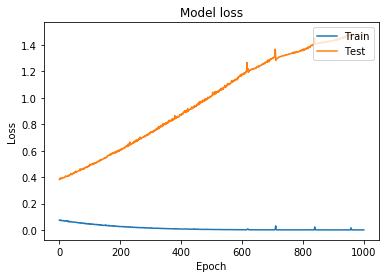

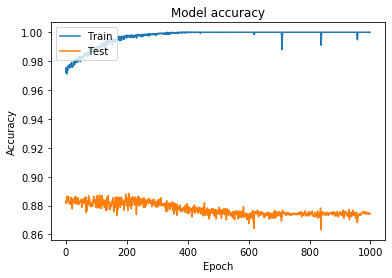

In [70]:
plot_loss(history.history['loss'], history.history['val_loss'])
plot_accuracy(history.history['accuracy'], history.history['val_accuracy'])

We observe the over-fitting here since the traning increases but test set reduces


# Early stopping your model

The early stopping callback is useful since it allows for you to stop the model training if it no longer improves after a given number of epochs. To make use of this functionality you need to pass the callback inside a list to the model's callback parameter in the .fit() method.

The model you built to detect fake dollar bills is loaded for you to train, this time with early stopping. X_train, y_train, X_test and y_test are also available for you to use.


# A combination of callbacks

Deep learning models can take a long time to train, especially when you move to deeper architectures and bigger datasets. Saving your model every time it improves as well as stopping it when it no longer does allows you to worry less about choosing the number of epochs to train for. You can also restore a saved model anytime. 

In [104]:
init_weights = model.get_weights()


In [68]:
# Import the early stopping callback
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor='val_accuracy', patience=5)

modelCheckpoint = ModelCheckpoint('best_banknote_model.hdf5', save_best_only = True)


model.fit(sensors_train, parcels_train, epochs=1000, validation_data=(sensors_test, parcels_test),
          callbacks=[monitor_val_acc,modelCheckpoint ])


Train on 1340 samples, validate on 660 samples
Epoch 1/1000
1340/1340 [==============================] - 0s 275us/sample - loss: 0.0741 - accuracy: 0.9756 - val_loss: 0.3764 - val_accuracy: 0.8854
Epoch 2/1000
1340/1340 [==============================] - 0s 163us/sample - loss: 0.0758 - accuracy: 0.9734 - val_loss: 0.3753 - val_accuracy: 0.8833
Epoch 3/1000
1340/1340 [==============================] - 0s 112us/sample - loss: 0.0746 - accuracy: 0.9751 - val_loss: 0.3795 - val_accuracy: 0.8828
Epoch 4/1000
1340/1340 [==============================] - 1s 478us/sample - loss: 0.0731 - accuracy: 0.9751 - val_loss: 0.3833 - val_accuracy: 0.8808
Epoch 5/1000
1340/1340 [==============================] - 0s 211us/sample - loss: 0.0763 - accuracy: 0.9704 - val_loss: 0.3793 - val_accuracy: 0.8843
Epoch 6/1000
1340/1340 [==============================] - 0s 181us/sample - loss: 0.0734 - accuracy: 0.9751 - val_loss: 0.3779 - val_accuracy: 0.8818


# Different activation functions
We  try out different activation functions on the multi-label model you built for the irrigation machine dataset. The function get_model() returns a copy of this model and applies the activation function, passed on as a parameter, to its hidden layer.
We  build a loop that goes through several activation functions, generates a new model for each and trains it. Storing the history callback in a dictionary will allow us to compare and visualize which activation function.

In [430]:
# Set a random seed
np.random.seed(1)
# Return a new model with the given activation
def get_model(act): 
    model = Sequential()
    model.add(Dense(64, input_shape=(20,), activation=act))
    model.add(Dense(3, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

sensors_train, sensors_test, parcels_train, parcels_test = train_test_split(sensors, parcels, test_size=0.33, random_state=42)


In [431]:

# Activation functions to try
activations = ['relu', 'sigmoid', 'tanh']

# Loop over the activation functions
activation_results = {}

for act in activations:
    # Get a new model with the current activation
    model = get_model(act)
    # Fit the model
    history = model.fit(sensors_train, parcels_train, validation_data=(sensors_test,parcels_test), epochs=200, verbose=0)
    activation_results[act] = history

In [432]:
activations = ['relu', 'sigmoid', 'tanh']
loss = {}
accuracy = {}
for act in activations:
    loss[act] = activation_results[act].history['loss']
    accuracy[act] = activation_results[act].history['accuracy']


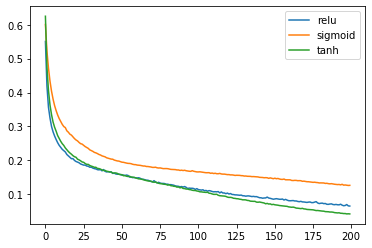

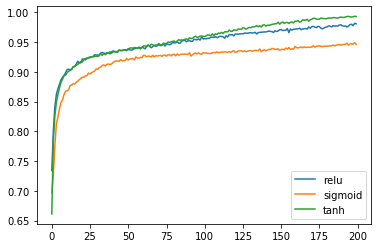

In [433]:
# Create a dataframe from val_loss_per_function
val_loss= pd.DataFrame(loss)

# Call plot on the dataframe
val_loss.plot()
plt.show()

# Create a dataframe from val_acc_per_function
val_acc = pd.DataFrame(accuracy)

# Call plot on the dataframe
val_acc.plot()
plt.show()

# Hyperparameter tuning
List of Neural network hyperparameters  are:

Number of layers

Number of neurons per layer

Layer activations

Batch sizes

Learning rates

Optimizers

As an example we optimize the the learning_rate, epochs, batch_size, and activation functions.

In [408]:
import tensorflow
# Set a random seed
np.random.seed(1)
# Return a new model with the given activation
def create_model(learning_rate, activation): 
    opt = tensorflow.keras.optimizers.Adam(lr=learning_rate)
    model = Sequential()
    model.add(Dense(64, input_shape=(20,), activation=activation))
    model.add(Dense(3, activation='sigmoid'))
    model.compile(optimizer= opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model



In [409]:
sensors_train, sensors_test, parcels_train, parcels_test = train_test_split(sensors, parcels, test_size=0.33, random_state=42)


In [414]:
# Import KerasClassifier from keras wrappers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model)

# Define the parameters to try out
params = {'activation':['relu', 'tanh'], 'batch_size':[32, 128, 256], 
          'epochs':[50, 100, 200], 'learning_rate':[0.1, 0.01, 0.001]}

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(model, param_distributions = params, cv = 3)
random_search.fit(sensors_train, parcels_train)


Train on 893 samples
Epoch 1/50
893/893 [==============================] - 1s 592us/sample - loss: 0.5719 - accuracy: 0.7219
Epoch 2/50
893/893 [==============================] - 0s 19us/sample - loss: 0.4198 - accuracy: 0.8029
Epoch 3/50
893/893 [==============================] - 0s 19us/sample - loss: 0.3665 - accuracy: 0.8358
Epoch 4/50
893/893 [==============================] - 0s 22us/sample - loss: 0.3314 - accuracy: 0.8559
Epoch 5/50
893/893 [==============================] - 0s 18us/sample - loss: 0.3056 - accuracy: 0.8720
Epoch 6/50
893/893 [==============================] - 0s 48us/sample - loss: 0.2846 - accuracy: 0.8832
Epoch 7/50
893/893 [==============================] - 0s 13us/sample - loss: 0.2681 - accuracy: 0.8880
Epoch 8/50
893/893 [==============================] - 0s 37us/sample - loss: 0.2558 - accuracy: 0.8947
Epoch 9/50
893/893 [==============================] - 0s 9us/sample - loss: 0.2406 - accuracy: 0.8988
Epoch 10/50
893/893 [==============================]

893/893 [==============================] - 0s 15us/sample - loss: 0.1514 - accuracy: 0.9395
Epoch 28/50
893/893 [==============================] - 0s 29us/sample - loss: 0.1494 - accuracy: 0.9429
Epoch 29/50
893/893 [==============================] - 0s 25us/sample - loss: 0.1486 - accuracy: 0.9451
Epoch 30/50
893/893 [==============================] - 0s 27us/sample - loss: 0.1468 - accuracy: 0.9436
Epoch 31/50
893/893 [==============================] - 0s 31us/sample - loss: 0.1409 - accuracy: 0.9459
Epoch 32/50
893/893 [==============================] - 0s 19us/sample - loss: 0.1396 - accuracy: 0.9433
Epoch 33/50
893/893 [==============================] - 0s 41us/sample - loss: 0.1379 - accuracy: 0.9477
Epoch 34/50
893/893 [==============================] - 0s 20us/sample - loss: 0.1345 - accuracy: 0.9459
Epoch 35/50
893/893 [==============================] - 0s 7us/sample - loss: 0.1334 - accuracy: 0.9477
Epoch 36/50
893/893 [==============================] - 0s 20us/sample - loss:

893/893 [==============================] - 0s 73us/sample - loss: 0.2922 - accuracy: 0.8779
Epoch 3/50
893/893 [==============================] - 0s 58us/sample - loss: 0.2559 - accuracy: 0.8903
Epoch 4/50
893/893 [==============================] - 0s 61us/sample - loss: 0.2276 - accuracy: 0.9097
Epoch 5/50
893/893 [==============================] - 0s 59us/sample - loss: 0.2062 - accuracy: 0.9145
Epoch 6/50
893/893 [==============================] - 0s 61us/sample - loss: 0.1907 - accuracy: 0.9268
Epoch 7/50
893/893 [==============================] - 0s 56us/sample - loss: 0.1853 - accuracy: 0.9283
Epoch 8/50
893/893 [==============================] - 0s 37us/sample - loss: 0.1779 - accuracy: 0.9283
Epoch 9/50
893/893 [==============================] - 0s 61us/sample - loss: 0.1624 - accuracy: 0.9351
Epoch 10/50
893/893 [==============================] - 0s 66us/sample - loss: 0.1603 - accuracy: 0.9339
Epoch 11/50
893/893 [==============================] - 0s 59us/sample - loss: 0.155

893/893 [==============================] - 0s 69us/sample - loss: 0.0712 - accuracy: 0.9780
Epoch 30/50
893/893 [==============================] - 0s 50us/sample - loss: 0.0673 - accuracy: 0.9780
Epoch 31/50
893/893 [==============================] - 0s 52us/sample - loss: 0.0665 - accuracy: 0.9791
Epoch 32/50
893/893 [==============================] - 0s 60us/sample - loss: 0.0671 - accuracy: 0.9795
Epoch 33/50
893/893 [==============================] - 0s 51us/sample - loss: 0.0631 - accuracy: 0.9821
Epoch 34/50
893/893 [==============================] - 0s 53us/sample - loss: 0.0603 - accuracy: 0.9825
Epoch 35/50
893/893 [==============================] - 0s 56us/sample - loss: 0.0536 - accuracy: 0.9851
Epoch 36/50
893/893 [==============================] - 0s 51us/sample - loss: 0.0529 - accuracy: 0.9862
Epoch 37/50
893/893 [==============================] - 0s 103us/sample - loss: 0.0442 - accuracy: 0.9899
Epoch 38/50
893/893 [==============================] - 0s 212us/sample - lo

893/893 [==============================] - 0s 30us/sample - loss: 0.5607 - accuracy: 0.7137
Epoch 4/50
893/893 [==============================] - 0s 35us/sample - loss: 0.5211 - accuracy: 0.7406
Epoch 5/50
893/893 [==============================] - 0s 32us/sample - loss: 0.4833 - accuracy: 0.7622
Epoch 6/50
893/893 [==============================] - 0s 38us/sample - loss: 0.4532 - accuracy: 0.7813
Epoch 7/50
893/893 [==============================] - 0s 23us/sample - loss: 0.4297 - accuracy: 0.7996
Epoch 8/50
893/893 [==============================] - 0s 24us/sample - loss: 0.4089 - accuracy: 0.8115
Epoch 9/50
893/893 [==============================] - 0s 32us/sample - loss: 0.3918 - accuracy: 0.8234
Epoch 10/50
893/893 [==============================] - 0s 26us/sample - loss: 0.3768 - accuracy: 0.8350
Epoch 11/50
893/893 [==============================] - 0s 39us/sample - loss: 0.3642 - accuracy: 0.8399
Epoch 12/50
893/893 [==============================] - 0s 23us/sample - loss: 0.35

893/893 [==============================] - 0s 20us/sample - loss: 0.2649 - accuracy: 0.8895
Epoch 30/50
893/893 [==============================] - 0s 27us/sample - loss: 0.2622 - accuracy: 0.8903
Epoch 31/50
893/893 [==============================] - 0s 22us/sample - loss: 0.2597 - accuracy: 0.8925
Epoch 32/50
893/893 [==============================] - 0s 32us/sample - loss: 0.2579 - accuracy: 0.8932
Epoch 33/50
893/893 [==============================] - 0s 41us/sample - loss: 0.2552 - accuracy: 0.8944
Epoch 34/50
893/893 [==============================] - 0s 40us/sample - loss: 0.2529 - accuracy: 0.8962
Epoch 35/50
893/893 [==============================] - 0s 23us/sample - loss: 0.2503 - accuracy: 0.8985
Epoch 36/50
893/893 [==============================] - 0s 25us/sample - loss: 0.2484 - accuracy: 0.8996
Epoch 37/50
893/893 [==============================] - 0s 33us/sample - loss: 0.2460 - accuracy: 0.8988
Epoch 38/50
893/893 [==============================] - 0s 33us/sample - loss

893/893 [==============================] - 0s 48us/sample - loss: 0.3776 - accuracy: 0.8384
Epoch 5/200
893/893 [==============================] - 0s 88us/sample - loss: 0.3522 - accuracy: 0.8514
Epoch 6/200
893/893 [==============================] - 0s 62us/sample - loss: 0.3317 - accuracy: 0.8656
Epoch 7/200
893/893 [==============================] - 0s 43us/sample - loss: 0.3159 - accuracy: 0.8753
Epoch 8/200
893/893 [==============================] - 0s 42us/sample - loss: 0.3041 - accuracy: 0.8723
Epoch 9/200
893/893 [==============================] - 0s 44us/sample - loss: 0.2922 - accuracy: 0.8802
Epoch 10/200
893/893 [==============================] - 0s 71us/sample - loss: 0.2853 - accuracy: 0.8854
Epoch 11/200
893/893 [==============================] - 0s 35us/sample - loss: 0.2749 - accuracy: 0.8895
Epoch 12/200
893/893 [==============================] - 0s 54us/sample - loss: 0.2665 - accuracy: 0.8906
Epoch 13/200
893/893 [==============================] - 0s 46us/sample - 

893/893 [==============================] - 0s 41us/sample - loss: 0.1218 - accuracy: 0.9537
Epoch 83/200
893/893 [==============================] - 0s 35us/sample - loss: 0.1207 - accuracy: 0.9545
Epoch 84/200
893/893 [==============================] - 0s 69us/sample - loss: 0.1200 - accuracy: 0.9545
Epoch 85/200
893/893 [==============================] - 0s 48us/sample - loss: 0.1199 - accuracy: 0.9537
Epoch 86/200
893/893 [==============================] - 0s 67us/sample - loss: 0.1178 - accuracy: 0.9560
Epoch 87/200
893/893 [==============================] - 0s 40us/sample - loss: 0.1151 - accuracy: 0.9593
Epoch 88/200
893/893 [==============================] - 0s 42us/sample - loss: 0.1151 - accuracy: 0.9571
Epoch 89/200
893/893 [==============================] - 0s 66us/sample - loss: 0.1146 - accuracy: 0.9545
Epoch 90/200
893/893 [==============================] - 0s 52us/sample - loss: 0.1129 - accuracy: 0.9593
Epoch 91/200
893/893 [==============================] - 0s 46us/samp

893/893 [==============================] - 0s 63us/sample - loss: 0.0619 - accuracy: 0.9881
Epoch 159/200
893/893 [==============================] - 0s 74us/sample - loss: 0.0605 - accuracy: 0.9866
Epoch 160/200
893/893 [==============================] - 0s 62us/sample - loss: 0.0598 - accuracy: 0.9869
Epoch 161/200
893/893 [==============================] - 0s 31us/sample - loss: 0.0598 - accuracy: 0.9888
Epoch 162/200
893/893 [==============================] - 0s 84us/sample - loss: 0.0593 - accuracy: 0.9895
Epoch 163/200
893/893 [==============================] - 0s 77us/sample - loss: 0.0592 - accuracy: 0.9881
Epoch 164/200
893/893 [==============================] - 0s 74us/sample - loss: 0.0580 - accuracy: 0.9888
Epoch 165/200
893/893 [==============================] - 0s 53us/sample - loss: 0.0568 - accuracy: 0.9899
Epoch 166/200
893/893 [==============================] - 0s 51us/sample - loss: 0.0559 - accuracy: 0.9914
Epoch 167/200
893/893 [==============================] - 0s 

893/893 [==============================] - 0s 59us/sample - loss: 0.1830 - accuracy: 0.9265
Epoch 34/200
893/893 [==============================] - 0s 98us/sample - loss: 0.1814 - accuracy: 0.9280
Epoch 35/200
893/893 [==============================] - 0s 57us/sample - loss: 0.1798 - accuracy: 0.9272
Epoch 36/200
893/893 [==============================] - 0s 49us/sample - loss: 0.1767 - accuracy: 0.9295
Epoch 37/200
893/893 [==============================] - 0s 49us/sample - loss: 0.1751 - accuracy: 0.9280
Epoch 38/200
893/893 [==============================] - 0s 46us/sample - loss: 0.1723 - accuracy: 0.9265
Epoch 39/200
893/893 [==============================] - 0s 56us/sample - loss: 0.1699 - accuracy: 0.9321
Epoch 40/200
893/893 [==============================] - 0s 85us/sample - loss: 0.1679 - accuracy: 0.9351
Epoch 41/200
893/893 [==============================] - 0s 62us/sample - loss: 0.1676 - accuracy: 0.9343
Epoch 42/200
893/893 [==============================] - 0s 49us/samp

893/893 [==============================] - 0s 72us/sample - loss: 0.0952 - accuracy: 0.9664
Epoch 111/200
893/893 [==============================] - 0s 53us/sample - loss: 0.0947 - accuracy: 0.9664
Epoch 112/200
893/893 [==============================] - 0s 50us/sample - loss: 0.0934 - accuracy: 0.9694
Epoch 113/200
893/893 [==============================] - 0s 48us/sample - loss: 0.0921 - accuracy: 0.9690
Epoch 114/200
893/893 [==============================] - 0s 72us/sample - loss: 0.0914 - accuracy: 0.9694
Epoch 115/200
893/893 [==============================] - ETA: 0s - loss: 0.0711 - accuracy: 0.96 - 0s 37us/sample - loss: 0.0910 - accuracy: 0.9683
Epoch 116/200
893/893 [==============================] - 0s 52us/sample - loss: 0.0905 - accuracy: 0.9705
Epoch 117/200
893/893 [==============================] - 0s 46us/sample - loss: 0.0887 - accuracy: 0.9709
Epoch 118/200
893/893 [==============================] - 0s 43us/sample - loss: 0.0878 - accuracy: 0.9713
Epoch 119/200
893/

893/893 [==============================] - 0s 78us/sample - loss: 0.0458 - accuracy: 0.9933
Epoch 187/200
893/893 [==============================] - 0s 108us/sample - loss: 0.0453 - accuracy: 0.9948
Epoch 188/200
893/893 [==============================] - 0s 56us/sample - loss: 0.0453 - accuracy: 0.9937
Epoch 189/200
893/893 [==============================] - 0s 81us/sample - loss: 0.0444 - accuracy: 0.9940
Epoch 190/200
893/893 [==============================] - 0s 59us/sample - loss: 0.0437 - accuracy: 0.9940
Epoch 191/200
893/893 [==============================] - 0s 69us/sample - loss: 0.0436 - accuracy: 0.9937
Epoch 192/200
893/893 [==============================] - 0s 86us/sample - loss: 0.0430 - accuracy: 0.9937
Epoch 193/200
893/893 [==============================] - 0s 82us/sample - loss: 0.0428 - accuracy: 0.9944
Epoch 194/200
893/893 [==============================] - 0s 60us/sample - loss: 0.0424 - accuracy: 0.9948
Epoch 195/200
893/893 [==============================] - 0s

894/894 [==============================] - 0s 61us/sample - loss: 0.1594 - accuracy: 0.9359
Epoch 63/200
894/894 [==============================] - 0s 42us/sample - loss: 0.1579 - accuracy: 0.9389
Epoch 64/200
894/894 [==============================] - 0s 75us/sample - loss: 0.1568 - accuracy: 0.9389
Epoch 65/200
894/894 [==============================] - 0s 51us/sample - loss: 0.1558 - accuracy: 0.9377
Epoch 66/200
894/894 [==============================] - 0s 35us/sample - loss: 0.1546 - accuracy: 0.9389
Epoch 67/200
894/894 [==============================] - 0s 46us/sample - loss: 0.1520 - accuracy: 0.9396
Epoch 68/200
894/894 [==============================] - 0s 50us/sample - loss: 0.1518 - accuracy: 0.9418
Epoch 69/200
894/894 [==============================] - 0s 57us/sample - loss: 0.1500 - accuracy: 0.9411
Epoch 70/200
894/894 [==============================] - 0s 67us/sample - loss: 0.1516 - accuracy: 0.9407
Epoch 71/200
894/894 [==============================] - 0s 46us/samp

894/894 [==============================] - 0s 56us/sample - loss: 0.0807 - accuracy: 0.9780
Epoch 140/200
894/894 [==============================] - 0s 37us/sample - loss: 0.0804 - accuracy: 0.9784
Epoch 141/200
894/894 [==============================] - 0s 89us/sample - loss: 0.0802 - accuracy: 0.9776
Epoch 142/200
894/894 [==============================] - 0s 60us/sample - loss: 0.0797 - accuracy: 0.9784
Epoch 143/200
894/894 [==============================] - 0s 52us/sample - loss: 0.0796 - accuracy: 0.9802
Epoch 144/200
894/894 [==============================] - 0s 52us/sample - loss: 0.0774 - accuracy: 0.9776
Epoch 145/200
894/894 [==============================] - 0s 72us/sample - loss: 0.0767 - accuracy: 0.9810
Epoch 146/200
894/894 [==============================] - 0s 56us/sample - loss: 0.0754 - accuracy: 0.9795
Epoch 147/200
894/894 [==============================] - 0s 54us/sample - loss: 0.0755 - accuracy: 0.9795
Epoch 148/200
894/894 [==============================] - 0s 

893/893 [==============================] - 0s 52us/sample - loss: 0.4327 - accuracy: 0.8205
Epoch 15/100
893/893 [==============================] - 0s 71us/sample - loss: 0.4356 - accuracy: 0.8238
Epoch 16/100
893/893 [==============================] - 0s 44us/sample - loss: 0.4663 - accuracy: 0.8149
Epoch 17/100
893/893 [==============================] - 0s 58us/sample - loss: 0.5122 - accuracy: 0.7783
Epoch 18/100
893/893 [==============================] - 0s 53us/sample - loss: 0.5952 - accuracy: 0.7824
Epoch 19/100
893/893 [==============================] - 0s 64us/sample - loss: 0.4538 - accuracy: 0.8212
Epoch 20/100
893/893 [==============================] - 0s 45us/sample - loss: 0.4043 - accuracy: 0.8414
Epoch 21/100
893/893 [==============================] - 0s 33us/sample - loss: 0.4430 - accuracy: 0.8287
Epoch 22/100
893/893 [==============================] - 0s 49us/sample - loss: 0.4508 - accuracy: 0.8171
Epoch 23/100
893/893 [==============================] - 0s 48us/samp

893/893 [==============================] - 0s 78us/sample - loss: 0.4062 - accuracy: 0.8417
Epoch 93/100
893/893 [==============================] - 0s 56us/sample - loss: 0.4485 - accuracy: 0.8290
Epoch 94/100
893/893 [==============================] - 0s 61us/sample - loss: 0.4469 - accuracy: 0.8261
Epoch 95/100
893/893 [==============================] - 0s 65us/sample - loss: 0.4154 - accuracy: 0.8261
Epoch 96/100
893/893 [==============================] - 0s 68us/sample - loss: 0.3810 - accuracy: 0.8414
Epoch 97/100
893/893 [==============================] - 0s 39us/sample - loss: 0.3669 - accuracy: 0.8563
Epoch 98/100
893/893 [==============================] - 0s 90us/sample - loss: 0.3839 - accuracy: 0.8492
Epoch 99/100
893/893 [==============================] - 0s 73us/sample - loss: 0.4426 - accuracy: 0.8111
Epoch 100/100
893/893 [==============================] - 0s 118us/sample - loss: 0.5208 - accuracy: 0.8059
Train on 893 samples
Epoch 1/100
893/893 [========================

893/893 [==============================] - 0s 85us/sample - loss: 0.3088 - accuracy: 0.8843
Epoch 69/100
893/893 [==============================] - 0s 50us/sample - loss: 0.3120 - accuracy: 0.8925
Epoch 70/100
893/893 [==============================] - 0s 68us/sample - loss: 0.2831 - accuracy: 0.9141
Epoch 71/100
893/893 [==============================] - 0s 40us/sample - loss: 0.2339 - accuracy: 0.9227
Epoch 72/100
893/893 [==============================] - 0s 58us/sample - loss: 0.2238 - accuracy: 0.9227
Epoch 73/100
893/893 [==============================] - 0s 55us/sample - loss: 0.2467 - accuracy: 0.9242
Epoch 74/100
893/893 [==============================] - 0s 34us/sample - loss: 0.4255 - accuracy: 0.8611
Epoch 75/100
893/893 [==============================] - 0s 49us/sample - loss: 0.3463 - accuracy: 0.8914
Epoch 76/100
893/893 [==============================] - 0s 67us/sample - loss: 0.2769 - accuracy: 0.9093
Epoch 77/100
893/893 [==============================] - 0s 51us/samp

894/894 [==============================] - 0s 37us/sample - loss: 0.3231 - accuracy: 0.8915
Epoch 45/100
894/894 [==============================] - 0s 36us/sample - loss: 0.2980 - accuracy: 0.8911
Epoch 46/100
894/894 [==============================] - 0s 39us/sample - loss: 0.3321 - accuracy: 0.8855
Epoch 47/100
894/894 [==============================] - 0s 36us/sample - loss: 0.3101 - accuracy: 0.8986
Epoch 48/100
894/894 [==============================] - 0s 35us/sample - loss: 0.2924 - accuracy: 0.9045
Epoch 49/100
894/894 [==============================] - 0s 36us/sample - loss: 0.3095 - accuracy: 0.8945
Epoch 50/100
894/894 [==============================] - 0s 31us/sample - loss: 0.3556 - accuracy: 0.8803
Epoch 51/100
894/894 [==============================] - 0s 36us/sample - loss: 0.3464 - accuracy: 0.8758
Epoch 52/100
894/894 [==============================] - 0s 31us/sample - loss: 0.3349 - accuracy: 0.8725
Epoch 53/100
894/894 [==============================] - 0s 45us/samp

893/893 [==============================] - 0s 13us/sample - loss: 0.1775 - accuracy: 0.9317
Epoch 21/200
893/893 [==============================] - 0s 9us/sample - loss: 0.1762 - accuracy: 0.9324
Epoch 22/200
893/893 [==============================] - 0s 14us/sample - loss: 0.1712 - accuracy: 0.9406
Epoch 23/200
893/893 [==============================] - 0s 13us/sample - loss: 0.1683 - accuracy: 0.9365
Epoch 24/200
893/893 [==============================] - 0s 9us/sample - loss: 0.1650 - accuracy: 0.9377
Epoch 25/200
893/893 [==============================] - 0s 9us/sample - loss: 0.1621 - accuracy: 0.9388
Epoch 26/200
893/893 [==============================] - 0s 9us/sample - loss: 0.1629 - accuracy: 0.9384
Epoch 27/200
893/893 [==============================] - 0s 9us/sample - loss: 0.1597 - accuracy: 0.9429
Epoch 28/200
893/893 [==============================] - 0s 9us/sample - loss: 0.1563 - accuracy: 0.9410
Epoch 29/200
893/893 [==============================] - 0s 9us/sample - lo

893/893 [==============================] - 0s 29us/sample - loss: 0.0390 - accuracy: 0.9963
Epoch 99/200
893/893 [==============================] - 0s 11us/sample - loss: 0.0381 - accuracy: 0.9959
Epoch 100/200
893/893 [==============================] - 0s 16us/sample - loss: 0.0368 - accuracy: 0.9966
Epoch 101/200
893/893 [==============================] - 0s 16us/sample - loss: 0.0366 - accuracy: 0.9970
Epoch 102/200
893/893 [==============================] - 0s 13us/sample - loss: 0.0363 - accuracy: 0.9966
Epoch 103/200
893/893 [==============================] - 0s 26us/sample - loss: 0.0362 - accuracy: 0.9966
Epoch 104/200
893/893 [==============================] - 0s 10us/sample - loss: 0.0350 - accuracy: 0.9951
Epoch 105/200
893/893 [==============================] - 0s 13us/sample - loss: 0.0342 - accuracy: 0.9970
Epoch 106/200
893/893 [==============================] - 0s 20us/sample - loss: 0.0333 - accuracy: 0.9970
Epoch 107/200
893/893 [==============================] - 0s 1

893/893 [==============================] - 0s 56us/sample - loss: 0.0112 - accuracy: 1.0000
Epoch 175/200
893/893 [==============================] - 0s 38us/sample - loss: 0.0109 - accuracy: 1.0000
Epoch 176/200
893/893 [==============================] - 0s 15us/sample - loss: 0.0109 - accuracy: 1.0000
Epoch 177/200
893/893 [==============================] - 0s 30us/sample - loss: 0.0108 - accuracy: 1.0000
Epoch 178/200
893/893 [==============================] - 0s 31us/sample - loss: 0.0107 - accuracy: 1.0000
Epoch 179/200
893/893 [==============================] - 0s 96us/sample - loss: 0.0106 - accuracy: 1.0000
Epoch 180/200
893/893 [==============================] - 0s 26us/sample - loss: 0.0105 - accuracy: 1.0000
Epoch 181/200
893/893 [==============================] - 0s 73us/sample - loss: 0.0102 - accuracy: 1.0000
Epoch 182/200
893/893 [==============================] - 0s 26us/sample - loss: 0.0102 - accuracy: 1.0000
Epoch 183/200
893/893 [==============================] - 0s 

893/893 [==============================] - 0s 18us/sample - loss: 0.0988 - accuracy: 0.9653
Epoch 50/200
893/893 [==============================] - 0s 0s/sample - loss: 0.0962 - accuracy: 0.9672
Epoch 51/200
893/893 [==============================] - 0s 18us/sample - loss: 0.0946 - accuracy: 0.9690
Epoch 52/200
893/893 [==============================] - 0s 19us/sample - loss: 0.0924 - accuracy: 0.9713
Epoch 53/200
893/893 [==============================] - 0s 0s/sample - loss: 0.0899 - accuracy: 0.9713
Epoch 54/200
893/893 [==============================] - 0s 18us/sample - loss: 0.0903 - accuracy: 0.9686
Epoch 55/200
893/893 [==============================] - 0s 36us/sample - loss: 0.0873 - accuracy: 0.9746
Epoch 56/200
893/893 [==============================] - 0s 15us/sample - loss: 0.0860 - accuracy: 0.9720
Epoch 57/200
893/893 [==============================] - 0s 14us/sample - loss: 0.0830 - accuracy: 0.9765
Epoch 58/200
893/893 [==============================] - 0s 84us/sample -

893/893 [==============================] - 0s 17us/sample - loss: 0.0198 - accuracy: 0.9996
Epoch 127/200
893/893 [==============================] - 0s 65us/sample - loss: 0.0196 - accuracy: 0.9993
Epoch 128/200
893/893 [==============================] - 0s 46us/sample - loss: 0.0189 - accuracy: 0.9996
Epoch 129/200
893/893 [==============================] - 0s 28us/sample - loss: 0.0182 - accuracy: 0.9993
Epoch 130/200
893/893 [==============================] - 0s 56us/sample - loss: 0.0175 - accuracy: 0.9996
Epoch 131/200
893/893 [==============================] - 0s 48us/sample - loss: 0.0173 - accuracy: 0.9996
Epoch 132/200
893/893 [==============================] - 0s 49us/sample - loss: 0.0173 - accuracy: 0.9996
Epoch 133/200
893/893 [==============================] - 0s 44us/sample - loss: 0.0167 - accuracy: 0.9996
Epoch 134/200
893/893 [==============================] - 0s 26us/sample - loss: 0.0165 - accuracy: 0.9996
Epoch 135/200
893/893 [==============================] - 0s 

894/894 [==============================] - 1s 896us/sample - loss: 0.6592 - accuracy: 0.6771
Epoch 2/200
894/894 [==============================] - 0s 24us/sample - loss: 0.4748 - accuracy: 0.7718
Epoch 3/200
894/894 [==============================] - 0s 13us/sample - loss: 0.4106 - accuracy: 0.8035
Epoch 4/200
894/894 [==============================] - 0s 37us/sample - loss: 0.3639 - accuracy: 0.8460
Epoch 5/200
894/894 [==============================] - 0s 45us/sample - loss: 0.3337 - accuracy: 0.8486
Epoch 6/200
894/894 [==============================] - 0s 36us/sample - loss: 0.3191 - accuracy: 0.8643
Epoch 7/200
894/894 [==============================] - 0s 39us/sample - loss: 0.3024 - accuracy: 0.8717
Epoch 8/200
894/894 [==============================] - 0s 3us/sample - loss: 0.2883 - accuracy: 0.8792
Epoch 9/200
894/894 [==============================] - 0s 133us/sample - loss: 0.2774 - accuracy: 0.8893
Epoch 10/200
894/894 [==============================] - 0s 31us/sample - lo

894/894 [==============================] - 0s 30us/sample - loss: 0.0742 - accuracy: 0.9810
Epoch 80/200
894/894 [==============================] - 0s 24us/sample - loss: 0.0729 - accuracy: 0.9825
Epoch 81/200
894/894 [==============================] - 0s 24us/sample - loss: 0.0720 - accuracy: 0.9825
Epoch 82/200
894/894 [==============================] - 0s 22us/sample - loss: 0.0707 - accuracy: 0.9832
Epoch 83/200
894/894 [==============================] - 0s 21us/sample - loss: 0.0704 - accuracy: 0.9832
Epoch 84/200
894/894 [==============================] - ETA: 0s - loss: 0.0693 - accuracy: 0.98 - 0s 27us/sample - loss: 0.0694 - accuracy: 0.9840
Epoch 85/200
894/894 [==============================] - 0s 20us/sample - loss: 0.0665 - accuracy: 0.9866
Epoch 86/200
894/894 [==============================] - 0s 93us/sample - loss: 0.0663 - accuracy: 0.9866
Epoch 87/200
894/894 [==============================] - 0s 17us/sample - loss: 0.0651 - accuracy: 0.9855
Epoch 88/200
894/894 [====

894/894 [==============================] - 0s 14us/sample - loss: 0.0203 - accuracy: 0.9996
Epoch 155/200
894/894 [==============================] - 0s 19us/sample - loss: 0.0201 - accuracy: 0.9996
Epoch 156/200
894/894 [==============================] - 0s 21us/sample - loss: 0.0199 - accuracy: 0.9993
Epoch 157/200
894/894 [==============================] - 0s 33us/sample - loss: 0.0199 - accuracy: 0.9993
Epoch 158/200
894/894 [==============================] - 0s 48us/sample - loss: 0.0198 - accuracy: 0.9996
Epoch 159/200
894/894 [==============================] - 0s 43us/sample - loss: 0.0198 - accuracy: 0.9996
Epoch 160/200
894/894 [==============================] - 0s 61us/sample - loss: 0.0192 - accuracy: 0.9996
Epoch 161/200
894/894 [==============================] - 0s 55us/sample - loss: 0.0185 - accuracy: 0.9996
Epoch 162/200
894/894 [==============================] - 0s 24us/sample - loss: 0.0185 - accuracy: 0.9996
Epoch 163/200
894/894 [==============================] - 0s 

893/893 [==============================] - 0s 37us/sample - loss: 0.1337 - accuracy: 0.9462
Epoch 30/100
893/893 [==============================] - 0s 27us/sample - loss: 0.1312 - accuracy: 0.9489
Epoch 31/100
893/893 [==============================] - 0s 42us/sample - loss: 0.1316 - accuracy: 0.9455
Epoch 32/100
893/893 [==============================] - 0s 40us/sample - loss: 0.1271 - accuracy: 0.9485
Epoch 33/100
893/893 [==============================] - 0s 76us/sample - loss: 0.1288 - accuracy: 0.9477
Epoch 34/100
893/893 [==============================] - 0s 55us/sample - loss: 0.1244 - accuracy: 0.9507
Epoch 35/100
893/893 [==============================] - 0s 39us/sample - loss: 0.1186 - accuracy: 0.9533
Epoch 36/100
893/893 [==============================] - 0s 67us/sample - loss: 0.1147 - accuracy: 0.9533
Epoch 37/100
893/893 [==============================] - 0s 70us/sample - loss: 0.1119 - accuracy: 0.9578
Epoch 38/100
893/893 [==============================] - 0s 36us/samp

893/893 [==============================] - 0s 58us/sample - loss: 0.3225 - accuracy: 0.8589
Epoch 5/100
893/893 [==============================] - 0s 84us/sample - loss: 0.2980 - accuracy: 0.8667
Epoch 6/100
893/893 [==============================] - 0s 40us/sample - loss: 0.2815 - accuracy: 0.8779
Epoch 7/100
893/893 [==============================] - 0s 81us/sample - loss: 0.2700 - accuracy: 0.8806
Epoch 8/100
893/893 [==============================] - 0s 59us/sample - loss: 0.2562 - accuracy: 0.8899
Epoch 9/100
893/893 [==============================] - 0s 46us/sample - loss: 0.2465 - accuracy: 0.8981
Epoch 10/100
893/893 [==============================] - 0s 97us/sample - loss: 0.2356 - accuracy: 0.8985
Epoch 11/100
893/893 [==============================] - 0s 20us/sample - loss: 0.2263 - accuracy: 0.9052
Epoch 12/100
893/893 [==============================] - 0s 42us/sample - loss: 0.2214 - accuracy: 0.9037
Epoch 13/100
893/893 [==============================] - 0s 115us/sample -

893/893 [==============================] - 0s 45us/sample - loss: 0.0844 - accuracy: 0.9657
Epoch 82/100
893/893 [==============================] - 0s 56us/sample - loss: 0.0714 - accuracy: 0.9750
Epoch 83/100
893/893 [==============================] - 0s 51us/sample - loss: 0.0670 - accuracy: 0.9795
Epoch 84/100
893/893 [==============================] - 0s 57us/sample - loss: 0.0674 - accuracy: 0.9761
Epoch 85/100
893/893 [==============================] - 0s 66us/sample - loss: 0.0650 - accuracy: 0.9761
Epoch 86/100
893/893 [==============================] - 0s 42us/sample - loss: 0.0589 - accuracy: 0.9825
Epoch 87/100
893/893 [==============================] - 0s 39us/sample - loss: 0.0576 - accuracy: 0.9821
Epoch 88/100
893/893 [==============================] - 0s 46us/sample - loss: 0.0597 - accuracy: 0.9795
Epoch 89/100
893/893 [==============================] - ETA: 0s - loss: 0.0596 - accuracy: 0.98 - 0s 35us/sample - loss: 0.0598 - accuracy: 0.9821
Epoch 90/100
893/893 [====

894/894 [==============================] - 0s 49us/sample - loss: 0.1014 - accuracy: 0.9616
Epoch 57/100
894/894 [==============================] - 0s 46us/sample - loss: 0.0993 - accuracy: 0.9646
Epoch 58/100
894/894 [==============================] - 0s 90us/sample - loss: 0.0961 - accuracy: 0.9672
Epoch 59/100
894/894 [==============================] - 0s 26us/sample - loss: 0.0956 - accuracy: 0.9646
Epoch 60/100
894/894 [==============================] - 0s 51us/sample - loss: 0.0894 - accuracy: 0.9657
Epoch 61/100
894/894 [==============================] - 0s 111us/sample - loss: 0.0919 - accuracy: 0.9642
Epoch 62/100
894/894 [==============================] - 0s 55us/sample - loss: 0.0899 - accuracy: 0.9642
Epoch 63/100
894/894 [==============================] - 0s 58us/sample - loss: 0.0892 - accuracy: 0.9687
Epoch 64/100
894/894 [==============================] - 0s 52us/sample - loss: 0.0878 - accuracy: 0.9672
Epoch 65/100
894/894 [==============================] - 0s 35us/sam

893/893 [==============================] - 0s 192us/sample - loss: 0.0683 - accuracy: 0.9787
Epoch 32/100
893/893 [==============================] - 0s 223us/sample - loss: 0.0743 - accuracy: 0.9757
Epoch 33/100
893/893 [==============================] - 0s 145us/sample - loss: 0.0765 - accuracy: 0.9735
Epoch 34/100
893/893 [==============================] - 0s 164us/sample - loss: 0.0646 - accuracy: 0.9791
Epoch 35/100
893/893 [==============================] - 0s 145us/sample - loss: 0.0572 - accuracy: 0.9828
Epoch 36/100
893/893 [==============================] - 0s 170us/sample - loss: 0.0557 - accuracy: 0.9858
Epoch 37/100
893/893 [==============================] - 0s 169us/sample - loss: 0.0476 - accuracy: 0.9892
Epoch 38/100
893/893 [==============================] - 0s 175us/sample - loss: 0.0505 - accuracy: 0.9869
Epoch 39/100
893/893 [==============================] - 0s 91us/sample - loss: 0.0503 - accuracy: 0.9881
Epoch 40/100
893/893 [==============================] - 0s 7

893/893 [==============================] - 0s 163us/sample - loss: 0.2116 - accuracy: 0.9164
Epoch 6/100
893/893 [==============================] - 0s 105us/sample - loss: 0.1856 - accuracy: 0.9283
Epoch 7/100
893/893 [==============================] - 0s 146us/sample - loss: 0.1830 - accuracy: 0.9265
Epoch 8/100
893/893 [==============================] - 0s 194us/sample - loss: 0.1723 - accuracy: 0.9306
Epoch 9/100
893/893 [==============================] - 0s 176us/sample - loss: 0.1700 - accuracy: 0.9309
Epoch 10/100
893/893 [==============================] - 0s 275us/sample - loss: 0.1552 - accuracy: 0.9403
Epoch 11/100
893/893 [==============================] - 0s 234us/sample - loss: 0.1490 - accuracy: 0.9421
Epoch 12/100
893/893 [==============================] - 0s 158us/sample - loss: 0.1527 - accuracy: 0.9332
Epoch 13/100
893/893 [==============================] - 0s 174us/sample - loss: 0.1504 - accuracy: 0.9403
Epoch 14/100
893/893 [==============================] - 0s 124u

893/893 [==============================] - 0s 119us/sample - loss: 0.0060 - accuracy: 1.0000
Epoch 83/100
893/893 [==============================] - 0s 206us/sample - loss: 0.0057 - accuracy: 1.0000
Epoch 84/100
893/893 [==============================] - 0s 130us/sample - loss: 0.0053 - accuracy: 1.0000
Epoch 85/100
893/893 [==============================] - 0s 107us/sample - loss: 0.0053 - accuracy: 1.0000
Epoch 86/100
893/893 [==============================] - 0s 129us/sample - loss: 0.0051 - accuracy: 1.0000
Epoch 87/100
893/893 [==============================] - 0s 152us/sample - loss: 0.0051 - accuracy: 1.0000
Epoch 88/100
893/893 [==============================] - 0s 122us/sample - loss: 0.0048 - accuracy: 1.0000
Epoch 89/100
893/893 [==============================] - 0s 124us/sample - loss: 0.0046 - accuracy: 1.0000
Epoch 90/100
893/893 [==============================] - 0s 101us/sample - loss: 0.0045 - accuracy: 1.0000
Epoch 91/100
893/893 [==============================] - 0s 

Epoch 56/100
894/894 [==============================] - 0s 83us/sample - loss: 0.0201 - accuracy: 0.9978
Epoch 57/100
894/894 [==============================] - ETA: 0s - loss: 0.0183 - accuracy: 0.99 - 0s 110us/sample - loss: 0.0183 - accuracy: 0.9985
Epoch 58/100
894/894 [==============================] - 0s 151us/sample - loss: 0.0176 - accuracy: 0.9981
Epoch 59/100
894/894 [==============================] - 0s 168us/sample - loss: 0.0169 - accuracy: 0.9996
Epoch 60/100
894/894 [==============================] - 0s 218us/sample - loss: 0.0171 - accuracy: 0.9996
Epoch 61/100
894/894 [==============================] - 0s 55us/sample - loss: 0.0160 - accuracy: 0.9996
Epoch 62/100
894/894 [==============================] - 0s 142us/sample - loss: 0.0146 - accuracy: 0.9996
Epoch 63/100
894/894 [==============================] - 0s 145us/sample - loss: 0.0150 - accuracy: 0.9989
Epoch 64/100
894/894 [==============================] - 0s 124us/sample - loss: 0.0132 - accuracy: 0.9996
Epoch 

893/893 [==============================] - 0s 143us/sample - loss: 0.3094 - accuracy: 0.8574
Epoch 31/100
893/893 [==============================] - 0s 109us/sample - loss: 0.2923 - accuracy: 0.8596
Epoch 32/100
893/893 [==============================] - 0s 67us/sample - loss: 0.2806 - accuracy: 0.8738
Epoch 33/100
893/893 [==============================] - 0s 95us/sample - loss: 0.2688 - accuracy: 0.9115
Epoch 34/100
893/893 [==============================] - 0s 96us/sample - loss: 0.2735 - accuracy: 0.9056
Epoch 35/100
893/893 [==============================] - 0s 62us/sample - loss: 0.2616 - accuracy: 0.9074
Epoch 36/100
893/893 [==============================] - 0s 74us/sample - loss: 0.2564 - accuracy: 0.9082
Epoch 37/100
893/893 [==============================] - 0s 118us/sample - loss: 0.2492 - accuracy: 0.9104
Epoch 38/100
893/893 [==============================] - 0s 27us/sample - loss: 0.2399 - accuracy: 0.9141
Epoch 39/100
893/893 [==============================] - 0s 83us/s

893/893 [==============================] - 0s 65us/sample - loss: 0.3985 - accuracy: 0.8037
Epoch 6/100
893/893 [==============================] - 0s 38us/sample - loss: 0.3806 - accuracy: 0.8096
Epoch 7/100
893/893 [==============================] - 0s 9us/sample - loss: 0.3405 - accuracy: 0.8425
Epoch 8/100
893/893 [==============================] - 0s 18us/sample - loss: 0.3058 - accuracy: 0.8626
Epoch 9/100
893/893 [==============================] - 0s 31us/sample - loss: 0.2758 - accuracy: 0.8858
Epoch 10/100
893/893 [==============================] - 0s 45us/sample - loss: 0.2544 - accuracy: 0.8888
Epoch 11/100
893/893 [==============================] - 0s 67us/sample - loss: 0.2344 - accuracy: 0.9078
Epoch 12/100
893/893 [==============================] - 0s 32us/sample - loss: 0.2252 - accuracy: 0.9063
Epoch 13/100
893/893 [==============================] - 0s 47us/sample - loss: 0.2150 - accuracy: 0.9130
Epoch 14/100
893/893 [==============================] - 0s 35us/sample - 

893/893 [==============================] - 0s 9us/sample - loss: 0.1551 - accuracy: 0.9377
Epoch 83/100
893/893 [==============================] - 0s 21us/sample - loss: 0.1550 - accuracy: 0.9306
Epoch 84/100
893/893 [==============================] - 0s 92us/sample - loss: 0.1568 - accuracy: 0.9373
Epoch 85/100
893/893 [==============================] - 0s 41us/sample - loss: 0.1585 - accuracy: 0.9362
Epoch 86/100
893/893 [==============================] - 0s 45us/sample - loss: 0.1515 - accuracy: 0.9306
Epoch 87/100
893/893 [==============================] - 0s 70us/sample - loss: 0.1528 - accuracy: 0.9388
Epoch 88/100
893/893 [==============================] - 0s 36us/sample - loss: 0.1535 - accuracy: 0.9369
Epoch 89/100
893/893 [==============================] - 0s 56us/sample - loss: 0.1513 - accuracy: 0.9365
Epoch 90/100
893/893 [==============================] - 0s 73us/sample - loss: 0.1550 - accuracy: 0.9354
Epoch 91/100
893/893 [==============================] - 0s 38us/sampl

894/894 [==============================] - 0s 68us/sample - loss: 0.2028 - accuracy: 0.9221
Epoch 58/100
894/894 [==============================] - 0s 109us/sample - loss: 0.2021 - accuracy: 0.9213
Epoch 59/100
894/894 [==============================] - 0s 30us/sample - loss: 0.2038 - accuracy: 0.9239
Epoch 60/100
894/894 [==============================] - 0s 33us/sample - loss: 0.2018 - accuracy: 0.9217
Epoch 61/100
894/894 [==============================] - 0s 48us/sample - loss: 0.1959 - accuracy: 0.9265
Epoch 62/100
894/894 [==============================] - 0s 40us/sample - loss: 0.1956 - accuracy: 0.9232
Epoch 63/100
894/894 [==============================] - 0s 25us/sample - loss: 0.1999 - accuracy: 0.9217
Epoch 64/100
894/894 [==============================] - 0s 27us/sample - loss: 0.1937 - accuracy: 0.9232
Epoch 65/100
894/894 [==============================] - 0s 61us/sample - loss: 0.1949 - accuracy: 0.9224
Epoch 66/100
894/894 [==============================] - 0s 52us/sam

893/893 [==============================] - 0s 29us/sample - loss: 0.3382 - accuracy: 0.8567
Epoch 33/200
893/893 [==============================] - 0s 18us/sample - loss: 0.3344 - accuracy: 0.8574
Epoch 34/200
893/893 [==============================] - 0s 32us/sample - loss: 0.3307 - accuracy: 0.8615
Epoch 35/200
893/893 [==============================] - 0s 109us/sample - loss: 0.3274 - accuracy: 0.8634
Epoch 36/200
893/893 [==============================] - 0s 34us/sample - loss: 0.3239 - accuracy: 0.8641
Epoch 37/200
893/893 [==============================] - 0s 44us/sample - loss: 0.3203 - accuracy: 0.8694
Epoch 38/200
893/893 [==============================] - 0s 71us/sample - loss: 0.3170 - accuracy: 0.8708
Epoch 39/200
893/893 [==============================] - 0s 61us/sample - loss: 0.3139 - accuracy: 0.8705
Epoch 40/200
893/893 [==============================] - 0s 63us/sample - loss: 0.3109 - accuracy: 0.8731
Epoch 41/200
893/893 [==============================] - 0s 98us/sam

893/893 [==============================] - 0s 60us/sample - loss: 0.2071 - accuracy: 0.9201
Epoch 109/200
893/893 [==============================] - 0s 77us/sample - loss: 0.2063 - accuracy: 0.9209
Epoch 110/200
893/893 [==============================] - 0s 29us/sample - loss: 0.2056 - accuracy: 0.9205
Epoch 111/200
893/893 [==============================] - 0s 72us/sample - loss: 0.2044 - accuracy: 0.9220
Epoch 112/200
893/893 [==============================] - 0s 96us/sample - loss: 0.2036 - accuracy: 0.9209
Epoch 113/200
893/893 [==============================] - 0s 56us/sample - loss: 0.2026 - accuracy: 0.9220
Epoch 114/200
893/893 [==============================] - 0s 42us/sample - loss: 0.2017 - accuracy: 0.9231
Epoch 115/200
893/893 [==============================] - 0s 80us/sample - loss: 0.2008 - accuracy: 0.9242
Epoch 116/200
893/893 [==============================] - 0s 91us/sample - loss: 0.1999 - accuracy: 0.9246
Epoch 117/200
893/893 [==============================] - 0s 

893/893 [==============================] - 0s 64us/sample - loss: 0.1554 - accuracy: 0.9403
Epoch 185/200
893/893 [==============================] - 0s 14us/sample - loss: 0.1550 - accuracy: 0.9403
Epoch 186/200
893/893 [==============================] - 0s 19us/sample - loss: 0.1545 - accuracy: 0.9414
Epoch 187/200
893/893 [==============================] - 0s 11us/sample - loss: 0.1539 - accuracy: 0.9410
Epoch 188/200
893/893 [==============================] - 0s 52us/sample - loss: 0.1536 - accuracy: 0.9418
Epoch 189/200
893/893 [==============================] - 0s 34us/sample - loss: 0.1529 - accuracy: 0.9429
Epoch 190/200
893/893 [==============================] - 0s 49us/sample - loss: 0.1527 - accuracy: 0.9410
Epoch 191/200
893/893 [==============================] - 0s 56us/sample - loss: 0.1521 - accuracy: 0.9421
Epoch 192/200
893/893 [==============================] - 0s 106us/sample - loss: 0.1515 - accuracy: 0.9414
Epoch 193/200
893/893 [==============================] - ET

893/893 [==============================] - 0s 23us/sample - loss: 0.2608 - accuracy: 0.8992
Epoch 60/200
893/893 [==============================] - 0s 37us/sample - loss: 0.2595 - accuracy: 0.8977
Epoch 61/200
893/893 [==============================] - 0s 14us/sample - loss: 0.2581 - accuracy: 0.8988
Epoch 62/200
893/893 [==============================] - 0s 37us/sample - loss: 0.2568 - accuracy: 0.8985
Epoch 63/200
893/893 [==============================] - 0s 121us/sample - loss: 0.2548 - accuracy: 0.8985
Epoch 64/200
893/893 [==============================] - 0s 95us/sample - loss: 0.2532 - accuracy: 0.8988
Epoch 65/200
893/893 [==============================] - 0s 30us/sample - loss: 0.2517 - accuracy: 0.9000
Epoch 66/200
893/893 [==============================] - 0s 27us/sample - loss: 0.2503 - accuracy: 0.9003
Epoch 67/200
893/893 [==============================] - 0s 53us/sample - loss: 0.2488 - accuracy: 0.9026
Epoch 68/200
893/893 [==============================] - 0s 41us/sam

893/893 [==============================] - 0s 36us/sample - loss: 0.1828 - accuracy: 0.9287
Epoch 136/200
893/893 [==============================] - 0s 50us/sample - loss: 0.1821 - accuracy: 0.9287
Epoch 137/200
893/893 [==============================] - 0s 27us/sample - loss: 0.1814 - accuracy: 0.9280
Epoch 138/200
893/893 [==============================] - 0s 24us/sample - loss: 0.1808 - accuracy: 0.9276
Epoch 139/200
893/893 [==============================] - 0s 42us/sample - loss: 0.1803 - accuracy: 0.9287
Epoch 140/200
893/893 [==============================] - ETA: 0s - loss: 0.1788 - accuracy: 0.93 - 0s 79us/sample - loss: 0.1796 - accuracy: 0.9302
Epoch 141/200
893/893 [==============================] - 0s 49us/sample - loss: 0.1788 - accuracy: 0.9295
Epoch 142/200
893/893 [==============================] - 0s 28us/sample - loss: 0.1782 - accuracy: 0.9295
Epoch 143/200
893/893 [==============================] - 0s 32us/sample - loss: 0.1776 - accuracy: 0.9306
Epoch 144/200
893/

894/894 [==============================] - 0s 21us/sample - loss: 0.4604 - accuracy: 0.7819
Epoch 10/200
894/894 [==============================] - 0s 19us/sample - loss: 0.4489 - accuracy: 0.7871
Epoch 11/200
894/894 [==============================] - 0s 20us/sample - loss: 0.4379 - accuracy: 0.7946
Epoch 12/200
894/894 [==============================] - 0s 111us/sample - loss: 0.4275 - accuracy: 0.7987
Epoch 13/200
894/894 [==============================] - 0s 19us/sample - loss: 0.4182 - accuracy: 0.8031
Epoch 14/200
894/894 [==============================] - 0s 41us/sample - loss: 0.4091 - accuracy: 0.8069
Epoch 15/200
894/894 [==============================] - 0s 37us/sample - loss: 0.4004 - accuracy: 0.8121
Epoch 16/200
894/894 [==============================] - 0s 54us/sample - loss: 0.3924 - accuracy: 0.8199
Epoch 17/200
894/894 [==============================] - ETA: 0s - loss: 0.3875 - accuracy: 0.83 - 0s 33us/sample - loss: 0.3851 - accuracy: 0.8244
Epoch 18/200
894/894 [===

894/894 [==============================] - 0s 22us/sample - loss: 0.2139 - accuracy: 0.9206
Epoch 87/200
894/894 [==============================] - ETA: 0s - loss: 0.2104 - accuracy: 0.92 - 0s 49us/sample - loss: 0.2134 - accuracy: 0.9221
Epoch 88/200
894/894 [==============================] - 0s 25us/sample - loss: 0.2121 - accuracy: 0.9213
Epoch 89/200
894/894 [==============================] - 0s 62us/sample - loss: 0.2113 - accuracy: 0.9202
Epoch 90/200
894/894 [==============================] - 0s 34us/sample - loss: 0.2098 - accuracy: 0.9202
Epoch 91/200
894/894 [==============================] - 0s 44us/sample - loss: 0.2087 - accuracy: 0.9239
Epoch 92/200
894/894 [==============================] - 0s 32us/sample - loss: 0.2080 - accuracy: 0.9236
Epoch 93/200
894/894 [==============================] - 0s 59us/sample - loss: 0.2070 - accuracy: 0.9239
Epoch 94/200
894/894 [==============================] - 0s 56us/sample - loss: 0.2059 - accuracy: 0.9236
Epoch 95/200
894/894 [====

894/894 [==============================] - 0s 134us/sample - loss: 0.1593 - accuracy: 0.9374
Epoch 163/200
894/894 [==============================] - 0s 16us/sample - loss: 0.1589 - accuracy: 0.9359
Epoch 164/200
894/894 [==============================] - 0s 21us/sample - loss: 0.1584 - accuracy: 0.9362
Epoch 165/200
894/894 [==============================] - 0s 15us/sample - loss: 0.1579 - accuracy: 0.9359
Epoch 166/200
894/894 [==============================] - 0s 24us/sample - loss: 0.1573 - accuracy: 0.9370
Epoch 167/200
894/894 [==============================] - 0s 16us/sample - loss: 0.1567 - accuracy: 0.9381
Epoch 168/200
894/894 [==============================] - 0s 46us/sample - loss: 0.1563 - accuracy: 0.9385
Epoch 169/200
894/894 [==============================] - 0s 34us/sample - loss: 0.1558 - accuracy: 0.9400
Epoch 170/200
894/894 [==============================] - 0s 33us/sample - loss: 0.1555 - accuracy: 0.9381
Epoch 171/200
894/894 [==============================] - 0s

1340/1340 [==============================] - 0s 27us/sample - loss: 0.1430 - accuracy: 0.9428
Epoch 37/50
1340/1340 [==============================] - 0s 11us/sample - loss: 0.1404 - accuracy: 0.9448
Epoch 38/50
1340/1340 [==============================] - 0s 35us/sample - loss: 0.1366 - accuracy: 0.9453
Epoch 39/50
1340/1340 [==============================] - ETA: 0s - loss: 0.1379 - accuracy: 0.94 - 0s 19us/sample - loss: 0.1404 - accuracy: 0.9420
Epoch 40/50
1340/1340 [==============================] - 0s 28us/sample - loss: 0.1352 - accuracy: 0.9463
Epoch 41/50
1340/1340 [==============================] - 0s 45us/sample - loss: 0.1353 - accuracy: 0.9443
Epoch 42/50
1340/1340 [==============================] - 0s 32us/sample - loss: 0.1331 - accuracy: 0.9493
Epoch 43/50
1340/1340 [==============================] - 0s 18us/sample - loss: 0.1284 - accuracy: 0.9495
Epoch 44/50
1340/1340 [==============================] - 0s 58us/sample - loss: 0.1279 - accuracy: 0.9512
Epoch 45/50
1340

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000002A296FBD940>,
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'activation': ['relu', 'tanh'], 'batch_size': [32, 128, 256], 'epochs': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [423]:
print(random_search.best_score_)
print(random_search.best_params_)

0.9002487358317446
{'learning_rate': 0.01, 'epochs': 50, 'batch_size': 256, 'activation': 'tanh'}


# Learning curves

In general, the accuracy of a model should be modified bz increasing the number of trainig set. To test that, we devide our training set to lower numbers in some steps to get the similar resluts of graph which is shown below.


<img src="num2.png" style="width:400px;height:250px;">


In [ ]:
train = pd.read_csv("irrigation_machine.csv")

In [136]:
X_train, X_test, y_train, y_test = train_test_split(sensors, parcels, test_size=0.33, random_state=42)

training_sizes = np.array([ 100,  200,  500, 1340])
early_stop = EarlyStopping(monitor='loss', patience=1)
train_accs = []
test_accs = []
init_weights = model.get_weights()

for size in training_sizes:
    # Get a fraction of training data (we only care about the training data)
    X_train_frac, y_train_frac = X_train[:size], y_train[:size]

    # Reset the model to the initial weights and train it on the new data fraction
    model.set_weights(init_weights)
    model.fit(X_train_frac, y_train_frac, epochs = 50, callbacks = [early_stop])

    # Get the accuracy for this training set fraction
    #train_acc = model.evaluate(X_train_frac, y_train_frac, verbose=0)[1]
    # train_accs.append(train_acc)
    
    # Evaluate and store the train fraction and the complete test set results
    train_accs.append(model.evaluate(X_train_frac, y_train_frac)[1])
    test_accs.append(model.evaluate(X_test, y_test)[1])
    


Train on 100 samples
Epoch 1/50
100/100 [==============================] - 0s 1ms/sample - loss: 0.0063 - accuracy: 0.9967
Epoch 2/50
100/100 [==============================] - 0s 171us/sample - loss: 0.0041 - accuracy: 1.0000
Epoch 3/50
100/100 [==============================] - 0s 93us/sample - loss: 0.0020 - accuracy: 1.0000
Epoch 4/50
100/100 [==============================] - 0s 527us/sample - loss: 0.0011 - accuracy: 1.0000
Epoch 5/50
100/100 [==============================] - 0s 737us/sample - loss: 6.8964e-04 - accuracy: 1.0000
Epoch 6/50
100/100 [==============================] - 0s 224us/sample - loss: 4.1477e-04 - accuracy: 1.0000
Epoch 7/50
100/100 [==============================] - 0s 88us/sample - loss: 3.5686e-04 - accuracy: 1.0000
Epoch 8/50
100/100 [==============================] - 0s 210us/sample - loss: 3.1207e-04 - accuracy: 1.0000
Epoch 9/50
100/100 [==============================] - 0s 303us/sample - loss: 2.9350e-04 - accuracy: 1.0000
Epoch 10/50
100/100 [======

500/500 [==============================] - 0s 151us/sample - loss: 1.7474e-04 - accuracy: 1.0000
Epoch 47/50
500/500 [==============================] - 0s 91us/sample - loss: 1.7300e-04 - accuracy: 1.0000
Epoch 48/50
500/500 [==============================] - 0s 138us/sample - loss: 1.7246e-04 - accuracy: 1.0000
Epoch 49/50
500/500 [==============================] - 0s 113us/sample - loss: 1.7070e-04 - accuracy: 1.0000
Epoch 50/50
660/660 [==============================] - 0s 166us/sample - loss: 1.5165 - accuracy: 0.8778
Train on 1340 samples
Epoch 1/50
1340/1340 [==============================] - 0s 188us/sample - loss: 0.0052 - accuracy: 0.9980
Epoch 2/50
1340/1340 [==============================] - 0s 161us/sample - loss: 0.0012 - accuracy: 0.9998
Epoch 3/50
1340/1340 [==============================] - 1s 546us/sample - loss: 4.8341e-04 - accuracy: 1.0000
Epoch 4/50
1340/1340 [==============================] - 1s 676us/sample - loss: 4.1037e-04 - accuracy: 1.0000
Epoch 5/50
1340/13

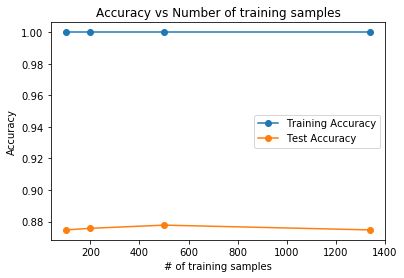

In [137]:
import matplotlib.pyplot as plt
def plot_results(train_accs,test_accs):
    plt.plot(training_sizes, train_accs, 'o-', label="Training Accuracy")
    plt.plot(training_sizes, test_accs, 'o-', label="Test Accuracy")
    plt.title('Accuracy vs Number of training samples')
    plt.xlabel('# of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc="best")
    plt.show()
    
plot_results(train_accs, test_accs)